# <a id='toc1_'></a>[Rozdział 4. Wykresy i inne metody wizualizacji danych](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Rozdział 4. Wykresy i inne metody wizualizacji danych](#toc1_)    
  - [Pierwsze kroki](#toc1_1_)    
  - [Figure](#toc1_2_)    
  - [Axes](#toc1_3_)    
  - [Rodzaje wykresów](#toc1_4_)    
  - [Formatowanie tekstu i adnotacje](#toc1_5_)    
  - [Właściwości linii](#toc1_6_)    
  - [Legenda](#toc1_7_)    
    - [Nazwy osi i tytuł wykresu](#toc1_7_1_)    
    - [Zakresy osi](#toc1_7_2_)    
    - [Podziałki i siatki](#toc1_7_3_)    
  - [Wykresy w skali logarytmicznej](#toc1_8_)    
  - [Wykresy z podwójnymi osiami](#toc1_9_)    
  - [Modyfikacje układu współrzędnych](#toc1_10_)    
  - [Złożone układy obiektów Axes](#toc1_11_)    
    - [Wstawki](#toc1_11_1_)    
  - [plt.subplots](#toc1_12_)    
    - [subplot2grid](#toc1_12_1_)    
    - [Gridspec](#toc1_12_2_)    
  - [Colormap](#toc1_13_)    
  - [Wykresy 3D](#toc1_14_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Pierwsze kroki](#toc0_)

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

import sympy

In [2]:
x = np.linspace(-5, 2, 100)
y1 = x**3 + 5*x**2 + 10
y2 = 3*x**2 + 10*x
y3 = 6*x + 10

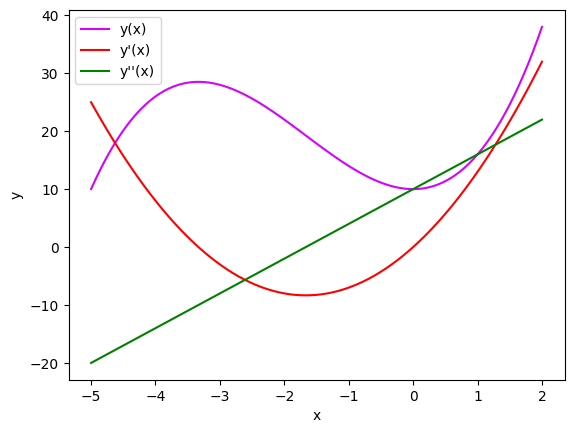

In [3]:
figure, ax = plt.subplots()

ax.plot(x, y1, color="#d303fc", label="y(x)")
ax.plot(x, y2, color="red", label="y'(x)")
ax.plot(x, y3, color="green", label="y''(x)")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend();

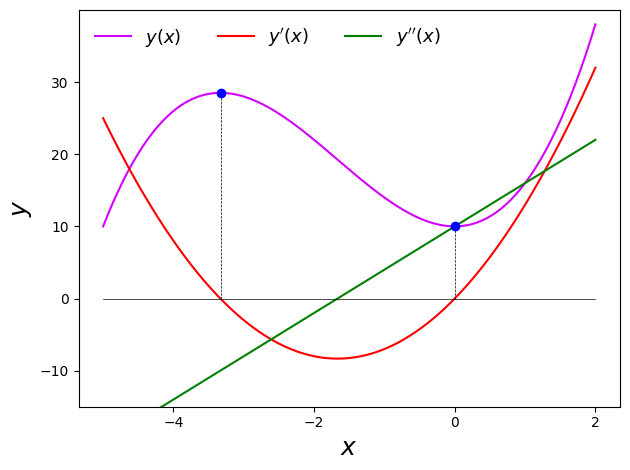

In [4]:
fig, ax = plt.subplots()

ax.plot(x, y1, lw=1.5, color="#d303fc", label=r"$y(x)$")
ax.plot(x, y2, lw=1.5, color="red", label=r"$y'(x)$")
ax.plot(x, y3, lw=1.5, color="green", label=r"$y''(x)$")

ax.plot(x, np.zeros_like(x), lw=0.5, color="black")
ax.plot([-3.33, -3.33], [0, (-3.3)**3 + 5*(-3.3)**2 + 10], ls='--', lw=0.5, color="black")
ax.plot([0, 0], [0, 10], lw=0.5, ls='--', color="black")
ax.plot([0], [10], lw=0.5, marker='o', color="blue")
ax.plot([-3.33], [(-3.3)**3 + 5*(-3.3)**2 + 10], lw=0.5, marker='o', color="blue")

ax.set_ylim(-15, 40)
ax.set_yticks([-10, 0, 10, 20, 30])
ax.set_xticks([-4, -2, 0, 2])

ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=0, ncol=3, fontsize=13, frameon=False)

fig.tight_layout();

## <a id='toc1_2_'></a>[Figure](#toc0_)

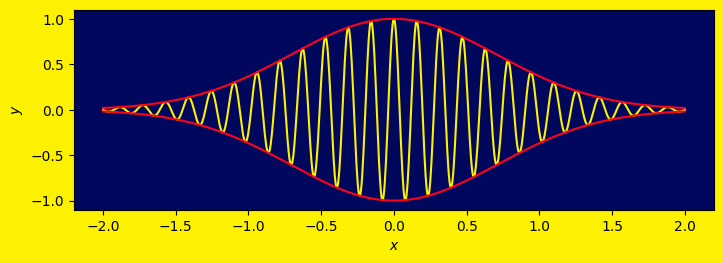

In [5]:
fig = plt.figure(figsize=(8, 2.5), facecolor="#fcf003")

# Współrzędne osi podaje się jako ułamek całej szerokości i wysokości obszaru roboczego.
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes((left, bottom, width, height), facecolor="#01075c")

x = np.linspace(-2, 2, 1000)
y1 = np.cos(40 * x)
y2 = np.exp(-x**2)

ax.plot(x, y1 * y2, color='#fcf003')
ax.plot(x, y2, color='#fc031c')
ax.plot(x, -y2, color='#fc031c')
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$");

## <a id='toc1_3_'></a>[Axes](#toc0_)

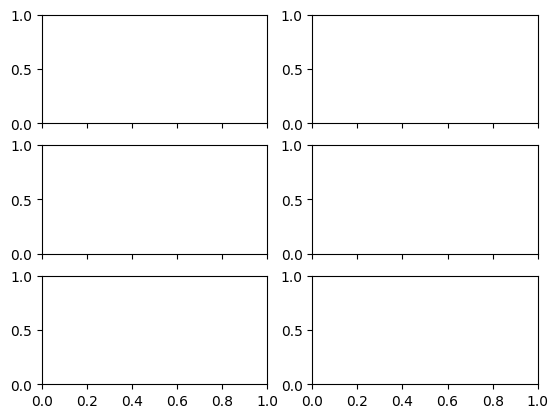

In [6]:
fig, axes = plt.subplots(ncols=2, nrows=3, sharex=True, sharey=False)

## <a id='toc1_4_'></a>[Rodzaje wykresów](#toc0_)

In [7]:
x = np.linspace(-3, 3, 25)
y1 = x**3+ 3 * x**2 + 10
y2 = -1.5 * x**3 + 10*x**2 - 15

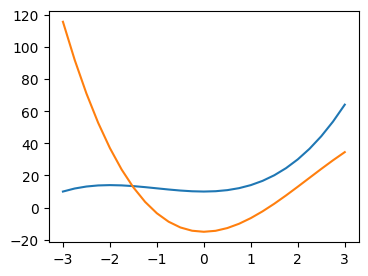

In [8]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(x, y1)
ax.plot(x, y2);

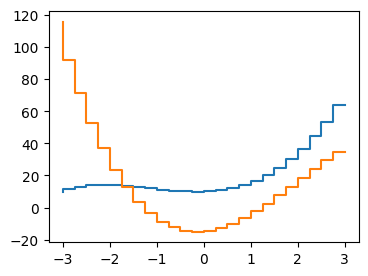

In [9]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.step(x, y1)
ax.step(x, y2);

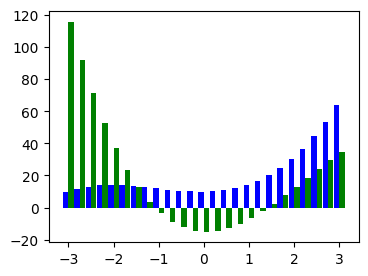

In [10]:
fig, ax = plt.subplots(figsize=(4, 3))
width = 6/50.0
ax.bar(x - width/2, y1, width=width, color="blue")
ax.bar(x + width/2, y2, width=width, color="green");

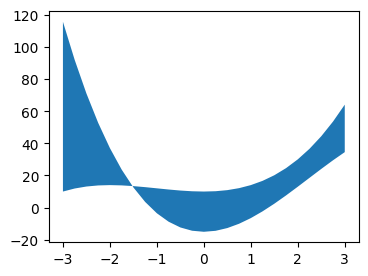

In [11]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.fill_between(x, y1, y2);

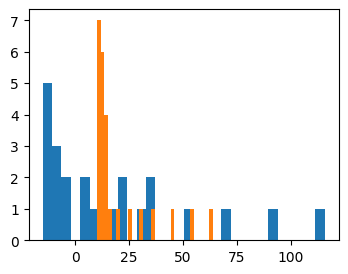

In [12]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.hist(y2, bins=30)
ax.hist(y1, bins=30);

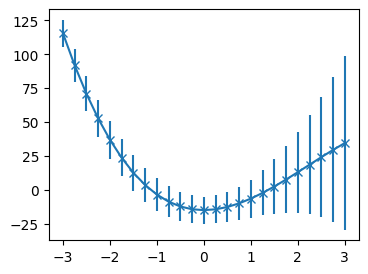

In [13]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.errorbar(x, y2, yerr=y1, fmt='x-');

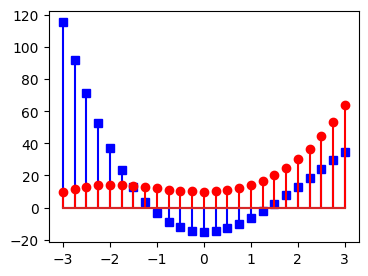

In [14]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.stem(x, y2, 'b', markerfmt='bs')
ax.stem(x, y1, 'r', markerfmt='ro');

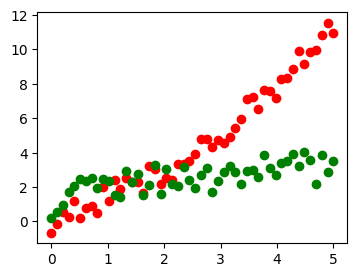

In [15]:
fig, ax = plt.subplots(figsize=(4, 3))

x = np.linspace(0, 5, 50)

ax.scatter(x, -1 + x + 0.25 * x**2 + 2 * np.random.rand(len(x)), color='red')
ax.scatter(x, np.sqrt(x) + 2 * np.random.rand(len(x)), color="green");

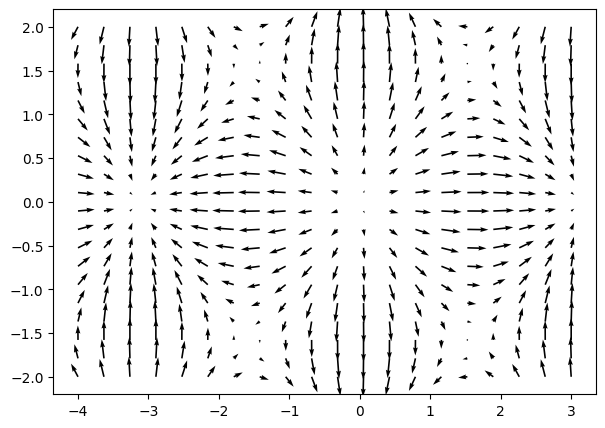

In [16]:
fig, ax = plt.subplots(figsize=(7, 5))

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

x, y = np.meshgrid(np.linspace(-4, 3, 20), np.linspace(-2, 2, 20))
u = np.sin(x) * np.cos(y)
v = np.sin(y) * np.cos(x)

ax.quiver(x, y, u, v);

## <a id='toc1_5_'></a>[Formatowanie tekstu i adnotacje](#toc0_)

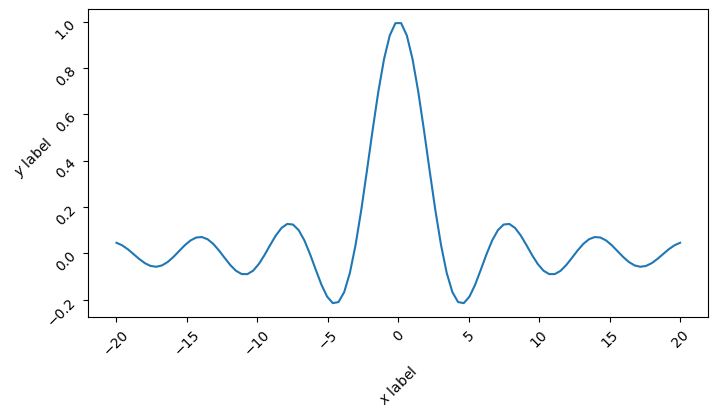

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))

x = np.linspace(-20, 20, 100)
y = np.sin(x) / x

ax.plot(x, y)

ax.set_ylabel(r"$y$ label", rotation=45)
ax.set_xlabel(r"$x$ label", rotation=45)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_rotation(45)

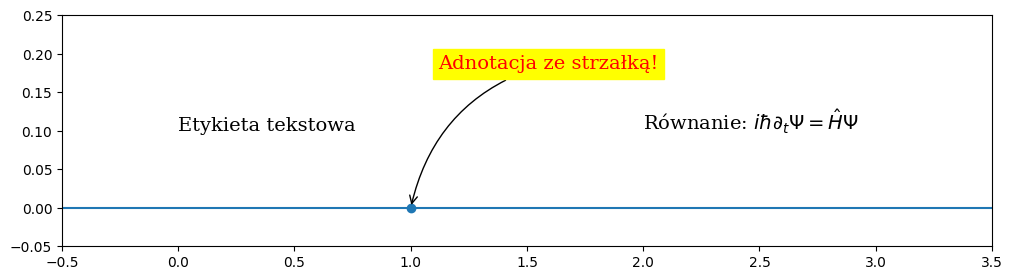

In [18]:
fig, ax = plt.subplots(figsize=(12, 3))

# ax.set_yticks([]) # ukryj oś y
# ax.set_xticks([]) # ukryj oś x
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-0.05, 0.25)
ax.axhline(0) # linia horyzontalna y=0

# Etykieta tekstowa
ax.text(0, 0.1, "Etykieta tekstowa", fontsize=14, family="serif")

# Adnotacja
ax.plot(1, 0, 'o')
ax.annotate("Adnotacja ze strzałką!",
            fontsize=14, family="serif", color='red', backgroundcolor='yellow',
            xy=(1, 0), xycoords='data',
            xytext=(+20, +100), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=0.3"))

# Równanie
ax.text(2, 0.1, r"Równanie: $i\hbar\partial_t \Psi = \hat{H}\Psi$", fontsize=14, family="serif");

## <a id='toc1_6_'></a>[Właściwości linii](#toc0_)

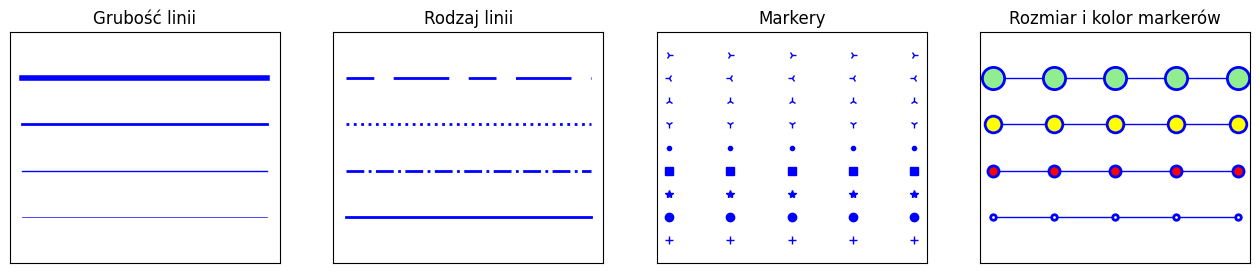

In [19]:
x = np.linspace(-5, 5, 5)
y = np.ones_like(x)
def axes_settings(fig, ax, title, ymax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0, ymax+1)
    ax.set_title(title)

fig, axes = plt.subplots(1, 4, figsize=(16,3))

# Grubość linii
linewidths = [0.5, 1.0, 2.0, 4.0]
for n, linewidth in enumerate(linewidths):
    axes[0].plot(x, y + n, color="blue", linewidth=linewidth) 
axes_settings(fig, axes[0], "Grubość linii", len(linewidths))

# Styl linii
linestyles = ['-', '-.', ':']
for n, linestyle in enumerate(linestyles):
    axes[1].plot(x, y + n, color="blue", lw=2, linestyle=linestyle)
# Własny styl linii przerywanej
line, = axes[1].plot(x, y + 3, color="blue", lw=2)
length1, gap1, length2, gap2 = 10, 7, 20, 7
line.set_dashes([length1, gap1, length2, gap2])
axes_settings(fig, axes[1], "Rodzaj linii", len(linestyles) + 1)

# Rodzaje markerów
markers = ['+', 'o', '*', 's', '.', '1', '2', '3', '4']
for n, marker in enumerate(markers):
    # lw = grubość linii, ls = styl linii
    axes[2].plot(x, y + n, color="blue", lw=2, ls=' ', marker=marker)
axes_settings(fig, axes[2], "Markery", len(markers))

# Rozmiar markerów i ich kolor
markersizecolors = [(4, "white"), (8, "red"), (12, "yellow"), (16, "lightgreen")]
for n, (markersize, markerfacecolor) in enumerate (markersizecolors):
    axes[3].plot(x, y + n, color="blue", lw=1, ls='-', marker='o', markersize=markersize, markerfacecolor=markerfacecolor, markeredgewidth=2)
axes_settings(fig, axes[3], "Rozmiar i kolor markerów", len(markersizecolors))

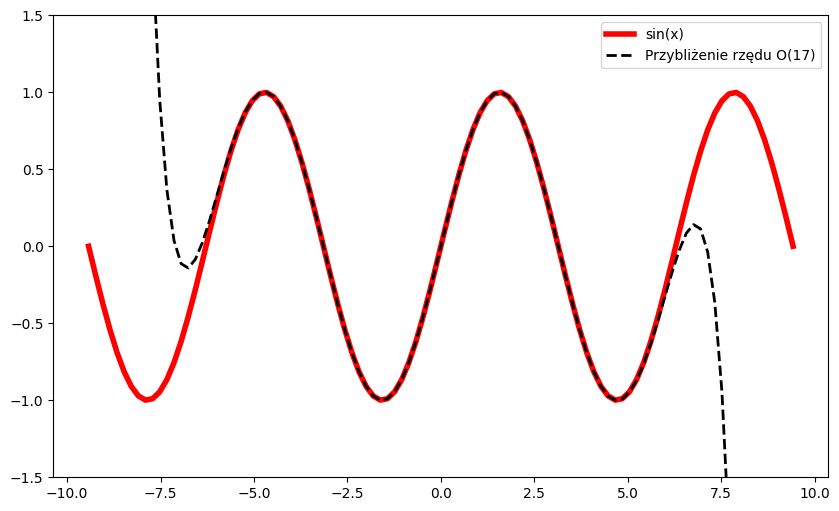

In [20]:
import sympy as sympy
import numpy as np

xSym = sympy.Symbol("x")
x = np.linspace(-3 * np.pi, 3 * np.pi, 100)

funSym = sympy.sin(xSym).series(n=17).removeO()
fun = sympy.lambdify(xSym, funSym, 'numpy')

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, np.sin(x), linewidth=4, color="red", linestyle='-', label='sin(x)')
ax.plot(x, fun(x), linewidth=2, color="black", linestyle='--', label='Przybliżenie rzędu O(17)')
ax.set_ylim(-1.5, 1.5)
ax.legend();

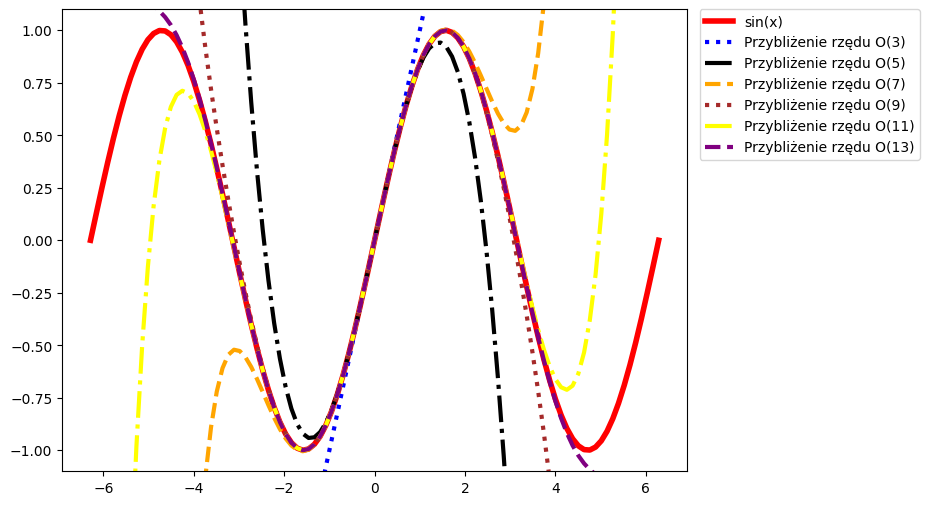

In [21]:
import sympy as s
import numpy as np

sym_x = s.Symbol("x")
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

def sin_expansion(x, N): # x - punkt ewaluacji, N - rząd szeregu
    series_sympy = s.sin(sym_x).series(n=N).removeO()
    series_numpy = s.lambdify(sym_x, series_sympy, 'numpy')
    return series_numpy(x)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, np.sin(x), linewidth=4, color="red", label='sin(x)')

colors = ["blue", "black", "orange", "brown", "yellow", "purple"]
linestyles = [':', '-.', '--']
for i, n in enumerate([3, 5, 7, 9, 11, 13]):
    ax.plot(x, sin_expansion(x, n), 
            color=colors[i],
            linestyle=linestyles[i % 3], 
            linewidth=3,
            label=f"Przybliżenie rzędu O({n})")
    
ax.set_ylim(-1.1, 1.1)
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
fig.subplots_adjust(right=.75); # Utworzenie miejsca na legendę

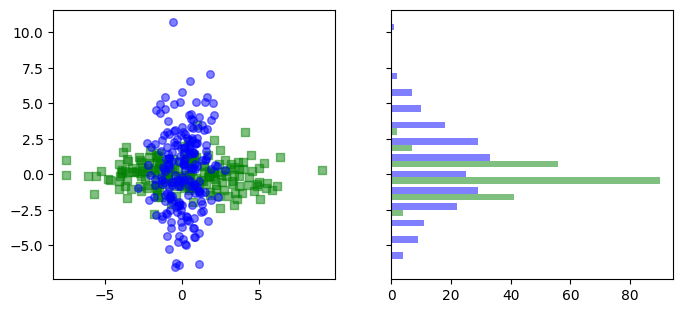

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3.5), sharey=True)

data1 = np.random.randn(200, 2) * np.array([3, 1])
area1 = (np.random.randn(200) + 0.5) * 100

data2 = np.random.randn(200, 2) * np.array([1, 3])
area2 = (np.random.randn(200) + 0.5) * 100

axes[0].scatter(data1[:,0], data1[:,1], color="green", marker="s", s=30, alpha=0.5)
axes[0].scatter(data2[:,0], data2[:,1], color="blue", marker="o", s=30, alpha=0.5)

axes[1].hist([data1[:,1], data2[:,1]], bins=15, color=["green", "blue"], alpha=0.5, orientation='horizontal');

## <a id='toc1_7_'></a>[Legenda](#toc0_)

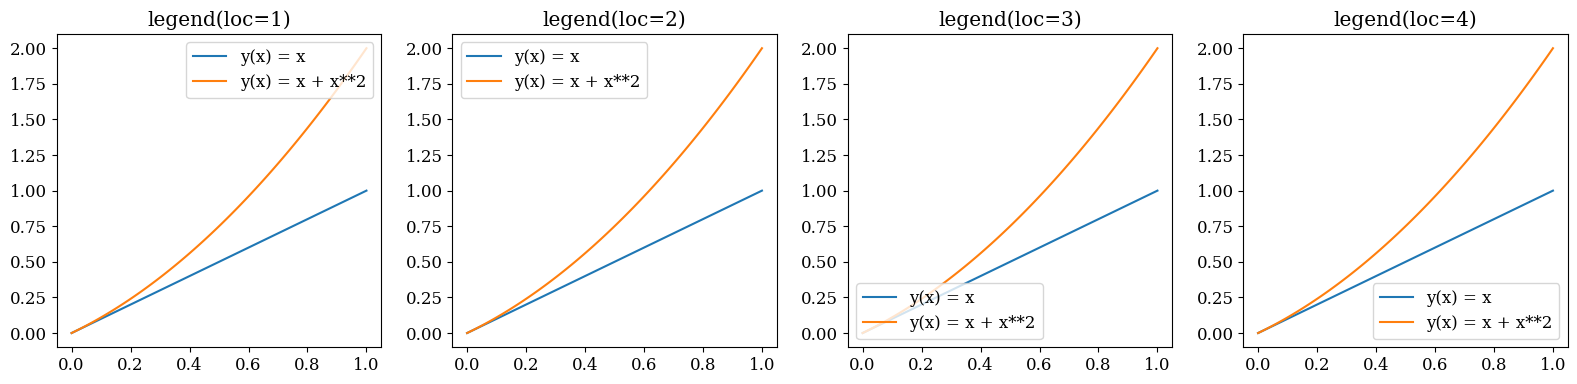

In [215]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

x = np.linspace(0, 1, 100)

for n in range(4):
    axes[n].plot(x, x, label="y(x) = x")
    axes[n].plot(x, x + x**2, label="y(x) = x + x**2")
    axes[n].legend(loc=n+1)
    axes[n].set_title("legend(loc=%d)" % (n+1))

fig.tight_layout();

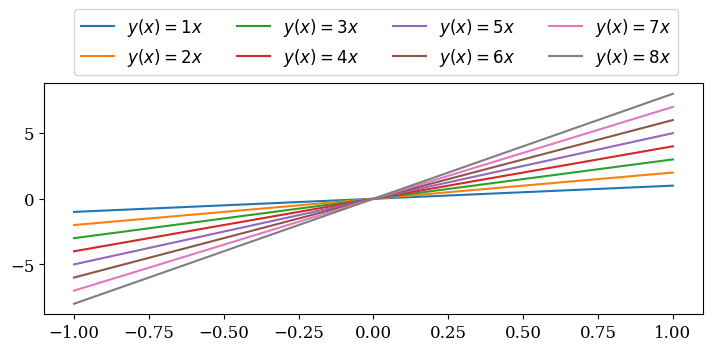

In [228]:
fig, ax = plt.subplots(1, 1, figsize=(8.5, 3))

x = np.linspace(-1, 1, 100)

for n in range(1, 9):
    ax.plot(x, n * x, label=f"$y(x) = {n} x$")

# loc należy interpretować jako punkt zaczepienia współrzędnych ramki legendy
# 1 - prawy górny róg, 2 - lewy górny róg, 3 - lewy dolny róg, 4 - prawy dolny róg
ax.legend(ncol=4, loc=4, bbox_to_anchor=(0.975, 1), fontsize=12);

### <a id='toc1_7_1_'></a>[Nazwy osi i tytuł wykresu](#toc0_)

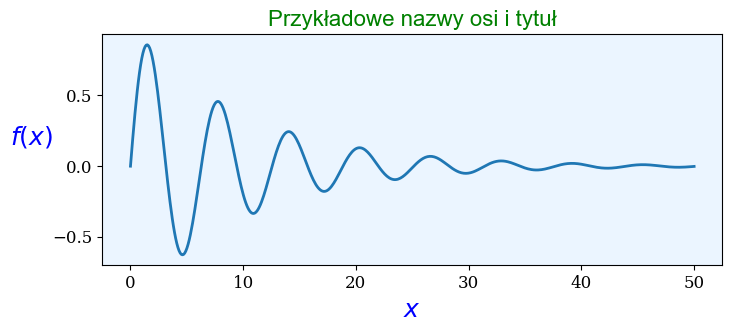

In [236]:
fig, ax = plt.subplots(figsize=(8, 3), subplot_kw={'facecolor': "#ebf5ff"})

x = np.linspace(0, 50, 500)
ax.plot(x, np.sin(x) * np.exp(-x/10), lw=2)

ax.set_xlabel("$x$", labelpad=5, fontsize=18, 
              fontname='serif', color="blue")
ax.set_ylabel("$f(x)$", labelpad=15, fontsize=18, 
              fontname='serif', color="blue", rotation=0)
ax.set_title("Przykładowe nazwy osi i tytuł", 
             loc='center', fontsize=16, fontname='arial', color="green");

### <a id='toc1_7_2_'></a>[Zakresy osi](#toc0_)

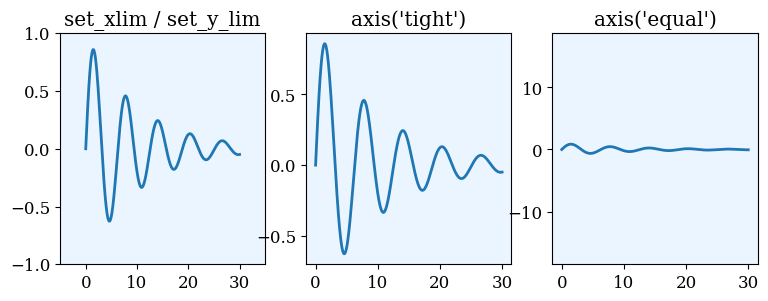

In [239]:
x = np.linspace(0, 30, 500)
y = np.sin(x) * np.exp(-x/10)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), subplot_kw={'facecolor': "#ebf5ff"})

axes[0].plot(x, y, lw=2)
axes[0].set_xlim(-5, 35)
axes[0].set_ylim(-1, 1)
axes[0].set_title("set_xlim / set_y_lim")

axes[1].plot(x, y, lw=2)
axes[1].axis('tight')
axes[1].set_title("axis('tight')")

axes[2].plot(x, y, lw=2)
axes[2].axis('equal')
axes[2].set_title("axis('equal')");

### <a id='toc1_7_3_'></a>[Podziałki i siatki](#toc0_)

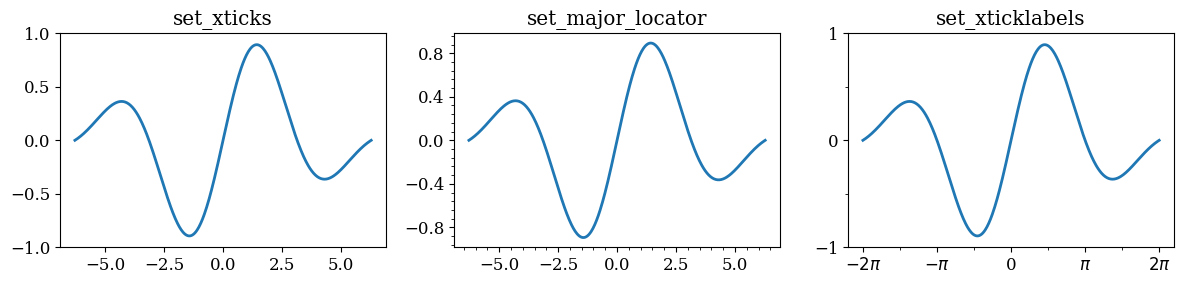

In [275]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
y = np.sin(x) * np.exp(-x**2/20)

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Dokładne określenie połorzenia podziałek za pomocą tablicy wartości
axes[0].plot(x, y, lw=2)
axes[0].set_title("set_xticks")
axes[0].set_yticks([-1, -0.5, 0, 0.5, 1])
axes[0].set_xticks([-5, -2.5, 0, 2.5, 5])

# Automatyczne wpisanie N podziałek i M podpodziałek na osi
N = 6; M = 5*N
axes[1].plot(x, y, lw=2)
axes[1].set_title("set_major_locator")
axes[1].xaxis.set_major_locator(mpl.ticker.MaxNLocator(N))
axes[1].yaxis.set_major_locator(mpl.ticker.MaxNLocator(N))
axes[1].xaxis.set_minor_locator(mpl.ticker.MaxNLocator(M))
axes[1].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(M))

# Dokładne określenie połorzenia podziałek i ich etykiet
axes[2].plot(x, y, lw=2)
axes[2].set_title("set_xticklabels")
axes[2].set_yticks([-1, 0, 1])
axes[2].set_xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi])
axes[2].set_xticklabels(['$-2\pi$', '$-\pi$', 0, r'$\pi$', r'$2\pi$'])
x_minor_ticker = mpl.ticker.FixedLocator([-3 * np.pi / 2, -np.pi/2, 0, np.pi/2, 3 * np.pi/2])
axes[2].xaxis.set_minor_locator(x_minor_ticker)
axes[2].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(4))


fig.tight_layout();

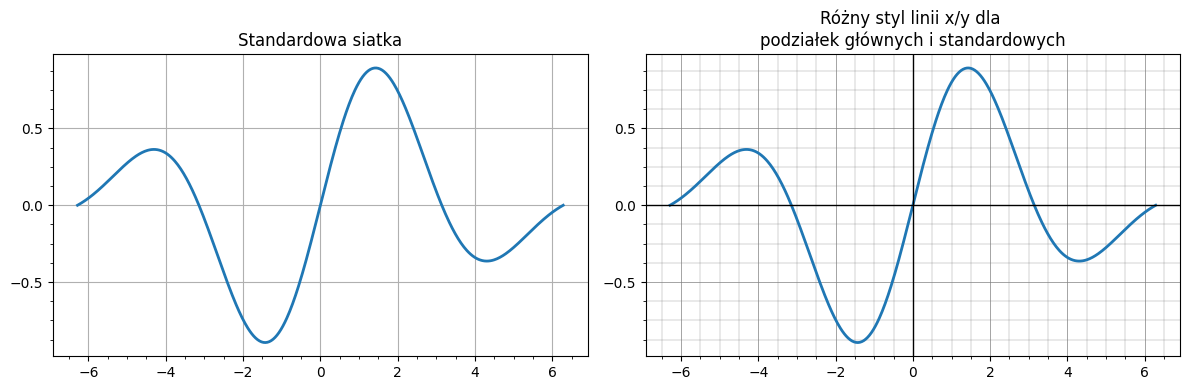

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
y = np.sin(x) * np.exp(-x**2/20)

# Podziałki i podpodziałki jako wielokrotnosci wartości
x_major_ticker = mpl.ticker.MultipleLocator(2)
x_minor_ticker = mpl.ticker.MultipleLocator(0.5)
y_major_ticker = mpl.ticker.MultipleLocator(0.5)
y_minor_ticker = mpl.ticker.MultipleLocator(0.125)

for ax in axes:
    ax.plot(x, y, lw=2)
    ax.xaxis.set_major_locator(x_major_ticker)
    ax.yaxis.set_major_locator(y_major_ticker)
    ax.xaxis.set_minor_locator(x_minor_ticker)
    ax.yaxis.set_minor_locator(y_minor_ticker)

axes[0].set_title("Standardowa siatka")
axes[0].grid()

# Nałożenie siatki
axes[1].set_title("Różny styl linii x/y dla \npodziałek głównych i standardowych")
axes[1].grid(color="grey", which="major", axis='x', linestyle='-', linewidth=0.5)
axes[1].grid(color="grey", which="minor", axis='x', linestyle='-', linewidth=0.25)
axes[1].grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.5)
axes[1].grid(color="grey", which="minor", axis='y', linestyle='-', linewidth=0.25)

# Dodanie osi za pomocą linii (do drugiego wykresu - po prawej)
axes[1].axvline(0, color='black', lw=1)
axes[1].axhline(0, color='black', lw=1)

fig.tight_layout();

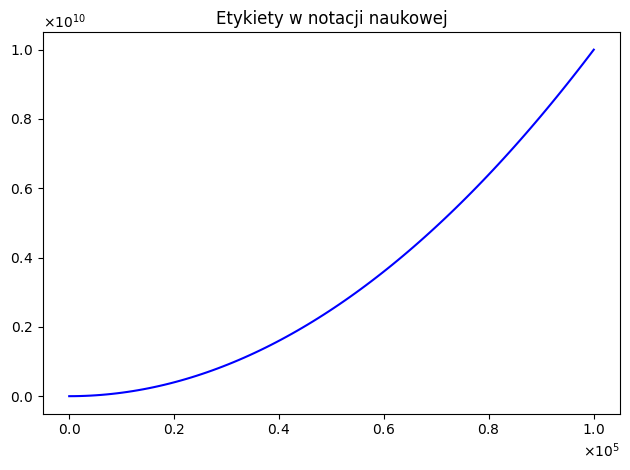

In [24]:
fig, ax = plt.subplots()

x = np.linspace(0, 1e5, 100)
y = x ** 2

ax.plot(x, y, 'b')
ax.set_title("Etykiety w notacji naukowej", loc='center')

# formatowanie naukowe
formatter = mpl.ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)

fig.tight_layout();

## <a id='toc1_8_'></a>[Wykresy w skali logarytmicznej](#toc0_)

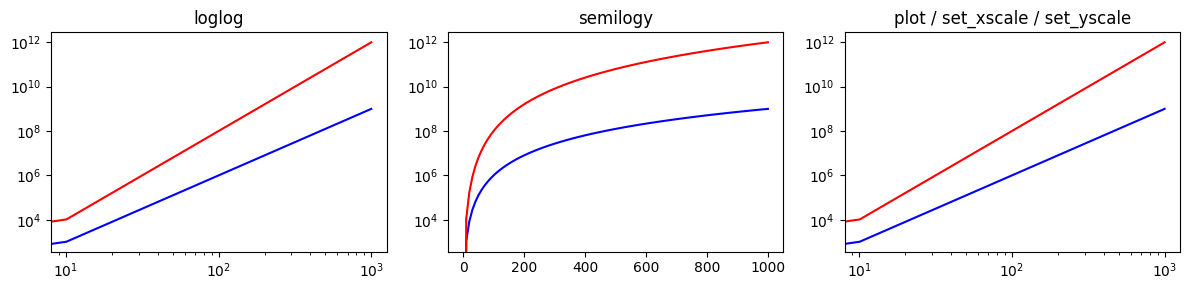

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

x = np.linspace(0, 1e3, 100)
y1, y2 = x**3, x**4

axes[0].set_title('loglog')
axes[0].loglog(x, y1, 'b', x, y2, 'r')

axes[1].set_title('semilogy')
axes[1].semilogy(x, y1, 'b', x, y2, 'r')

axes[2].set_title('plot / set_xscale / set_yscale')
axes[2].plot(x, y1, 'b', x, y2, 'r')
axes[2].set_xscale('log')
axes[2].set_yscale('log')

fig.tight_layout();

## <a id='toc1_9_'></a>[Wykresy z podwójnymi osiami](#toc0_)

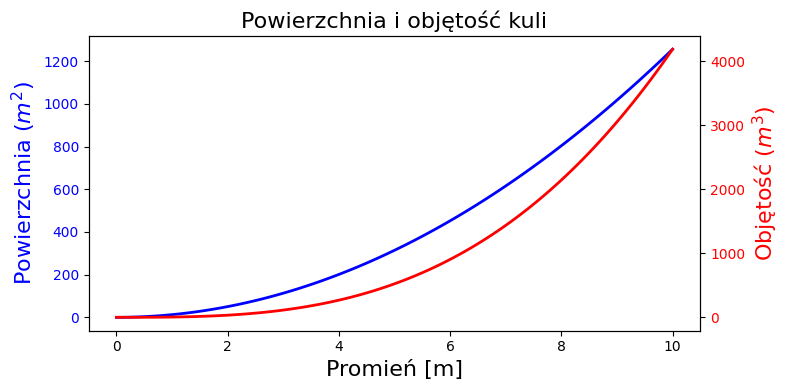

In [28]:
fig, ax1 = plt.subplots(figsize=(8, 4))

r = np.linspace(0, 10, 100)
a = 4 * np.pi * r ** 2  # Powierzchnia
v = (4 * np.pi / 3) * r ** 3  # Objętość


ax1.set_title("Powierzchnia i objętość kuli", fontsize=16)
ax1.set_xlabel("Promień [m]", fontsize=16)

ax1.plot(r, a, lw=2, color="blue")
ax1.set_ylabel(r"Powierzchnia ($m^2$)", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(r, v, lw=2, color="red")
ax2.set_ylabel(r"Objętość ($m^3$)", fontsize=16, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")
    
fig.tight_layout();

## <a id='toc1_10_'></a>[Modyfikacje układu współrzędnych](#toc0_)

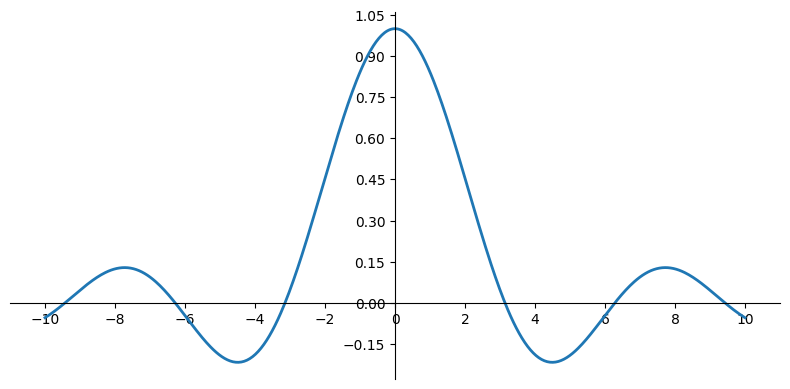

In [53]:
x = np.linspace(-10, 10, 500)
y = np.sin(x) / x

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y, linewidth=2)

# Usunięcie górnej i prawej osi układu
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Przesunięcie lewej i dolnej osi, tak aby środek układu znajdował się w punkcie (0,0)
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
    
x_major_ticker = mpl.ticker.MultipleLocator(2)
y_major_ticker = mpl.ticker.MultipleLocator(0.15)
ax.xaxis.set_major_locator(x_major_ticker)
ax.yaxis.set_major_locator(y_major_ticker)
    
fig.tight_layout();

## <a id='toc1_11_'></a>[Złożone układy obiektów Axes](#toc0_)

### <a id='toc1_11_1_'></a>[Wstawki](#toc0_)

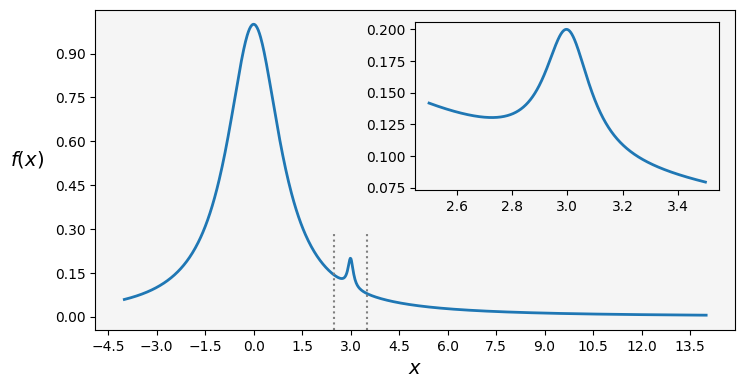

In [118]:
import numpy as np

def f(x):
  return 1/(1 + x**2) + 0.1/(1 + ((3 - x)/0.1)**2)

fig = plt.figure(figsize=(8, 4))
    
# Główny wykres
ax1 = fig.add_axes([0.1, 0.15, 0.8, 0.8], facecolor="#f5f5f5")
x = np.linspace(-4, 14, 1000)
ax1.plot(x, f(x), linewidth=2)
ax1.xaxis.set_major_locator(mpl.ticker.MaxNLocator(15))
ax1.yaxis.set_major_locator(mpl.ticker.MaxNLocator(10))
ax1.set_xlabel(r"$x$", fontsize=14)
ax1.set_ylabel(r"$f(x)$", fontsize=14, rotation=0, labelpad=20)

# Wstawka
x0, x1 = 2.5, 3.5
ax1.axvline(x0, ymax=0.3, color="grey", linestyle=":")
ax1.axvline(x1, ymax=0.3, color="grey", linestyle=":")

ax2 = fig.add_axes([0.5, 0.5, 0.38, 0.42], facecolor='#f5f5f5')
x = np.linspace(x0, x1, 1000)
ax2.plot(x, f(x), linewidth=2);

## <a id='toc1_12_'></a>[plt.subplots](#toc0_)

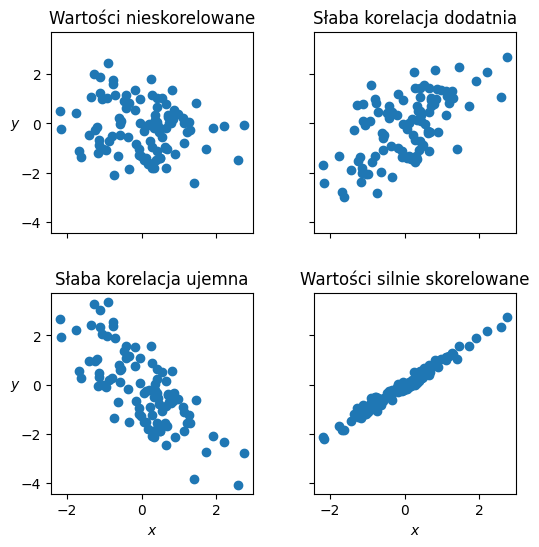

In [140]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=True)

x1 = np.random.randn(100)
x2 = np.random.randn(100)

axes[0, 0].set_title("Wartości nieskorelowane")
axes[0, 0].scatter(x1, x2)

axes[0, 1].set_title("Słaba korelacja dodatnia")
axes[0, 1].scatter(x1, x1 + x2)

axes[1, 0].set_title("Słaba korelacja ujemna")
axes[1, 0].scatter(x1, -x1 + x2)

axes[1, 1].set_title("Wartości silnie skorelowane")
axes[1, 1].scatter(x1, x1 + 0.15 * x2)

axes[1, 1].set_xlabel("$x$")
axes[1, 0].set_xlabel("$x$")
axes[0, 0].set_ylabel("$y$", rotation=0)
axes[1, 0].set_ylabel("$y$", rotation=0)

plt.subplots_adjust(wspace=0.3, hspace=0.3);

### <a id='toc1_12_1_'></a>[subplot2grid](#toc0_)

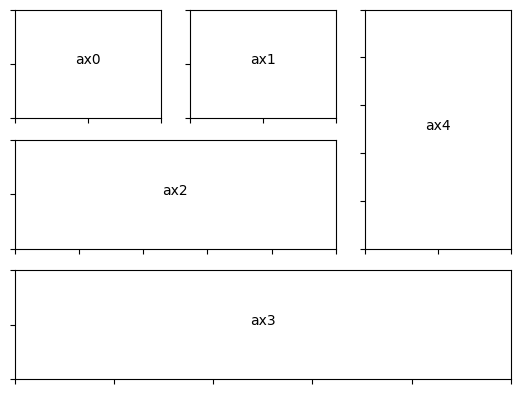

In [141]:
fig = plt.figure()

def clear_ticklabels(ax):
    ax.set_yticklabels([])
    ax.set_xticklabels([])

shape = (3, 3)
ax0 = plt.subplot2grid(shape, (0, 0))
ax1 = plt.subplot2grid(shape, (0, 1))
ax2 = plt.subplot2grid(shape, (1, 0), colspan=2)
ax3 = plt.subplot2grid(shape, (2, 0), colspan=3)
ax4 = plt.subplot2grid(shape, (0, 2), rowspan=2)

axes = [ax0, ax1, ax2, ax3, ax4]
[ax.text(0.5, 0.5, f"ax{n}", horizontalalignment='center') for n, ax in enumerate(axes)]
[clear_ticklabels(ax) for ax in axes];

### <a id='toc1_12_2_'></a>[Gridspec](#toc0_)

In [143]:
from matplotlib.gridspec import GridSpec

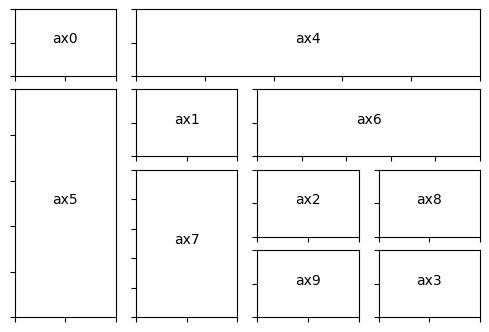

In [146]:
fig = plt.figure(figsize=(6, 4))

gs = mpl.gridspec.GridSpec(4, 4)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 1])
ax2 = fig.add_subplot(gs[2, 2])
ax3 = fig.add_subplot(gs[3, 3])

ax4 = fig.add_subplot(gs[0, 1:])
ax5 = fig.add_subplot(gs[1:, 0])

ax6 = fig.add_subplot(gs[1, 2:])
ax7 = fig.add_subplot(gs[2:, 1])

ax8 = fig.add_subplot(gs[2, 3])
ax9 = fig.add_subplot(gs[3, 2])


def clear_ticklabels(ax):
    ax.set_yticklabels([])
    ax.set_xticklabels([])

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
[ax.text(0.5, 0.5, f"ax{n}", horizontalalignment='center') for n, ax in enumerate(axes)]
[clear_ticklabels(ax) for ax in axes];

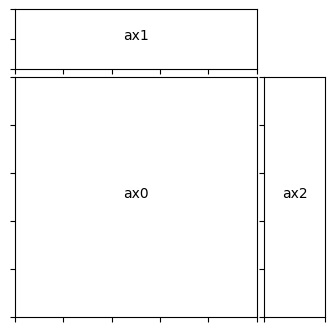

In [147]:
fig = plt.figure(figsize=(4, 4))

gs = mpl.gridspec.GridSpec(2, 2,
                           width_ratios=[4, 1],
                           height_ratios=[1, 4],
                           wspace=0.05, hspace=0.05
                           )

ax0 = fig.add_subplot(gs[1, 0])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 1])

def clear_ticklabels(ax):
    ax.set_yticklabels([])
    ax.set_xticklabels([])

axes = [ax0, ax1, ax2]
[ax.text(0.5, 0.5, "ax%d" % n, horizontalalignment='center') for n, ax in enumerate(axes)]
[clear_ticklabels(ax) for ax in axes];

## <a id='toc1_13_'></a>[Colormap](#toc0_)

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

In [5]:
X, Y = np.meshgrid(np.linspace(-2, 2, 300), np.linspace(-2, 2, 300))

R1 = np.sqrt((X+0.5)**2 + (Y+0.5)**2)
R2 = np.sqrt((X+0.5)**2 + (Y-0.5)**2)
R3 = np.sqrt((X-0.5)**2 + (Y+0.5)**2)
R4 = np.sqrt((X-0.5)**2 + (Y-0.5)**2)

Z = np.sin(10 * R1) / (10 * R1) + np.sin(20 * R4) / (20 * R4)

In [4]:
from matplotlib.colors import LinearSegmentedColormap

# Define custom colormap with gradient
colors = [(0, 0, 1), (0, 1, 0), (1, 1, 0), (1, 0, 0)]  # RGB values for blue, green, yellow, red
positions = [0, 0.3333, 0.6666, 1]  # Corresponding positions for the colors
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', list(zip(positions, colors)))
# Built-in colormaps: seismic / RdYlBu_r / RdBu_r

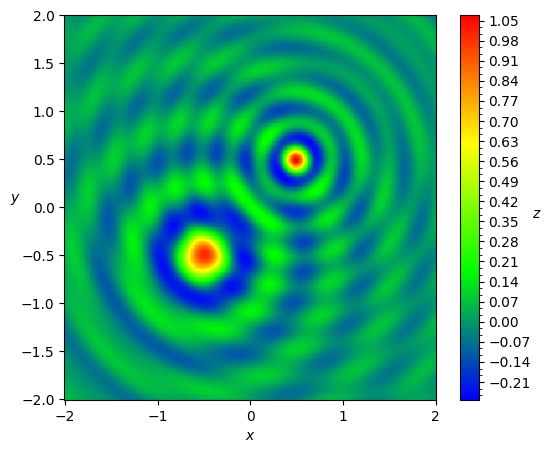

In [6]:
fig, ax = plt.subplots(figsize=(6, 5))

p = ax.pcolor(X, Y, Z, 
              vmin=Z.min(), vmax=Z.max(), cmap=custom_cmap)
ax.axis('tight')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)


cb = fig.colorbar(p, ax=ax)
cb.set_label("$z$", rotation=0)

N = 0.07; M = N/3
y_major_ticker = mpl.ticker.MultipleLocator(N)
y_minor_ticker = mpl.ticker.MultipleLocator(M)
cb.ax.yaxis.set_major_locator(y_major_ticker)
cb.ax.yaxis.set_minor_locator(y_minor_ticker);

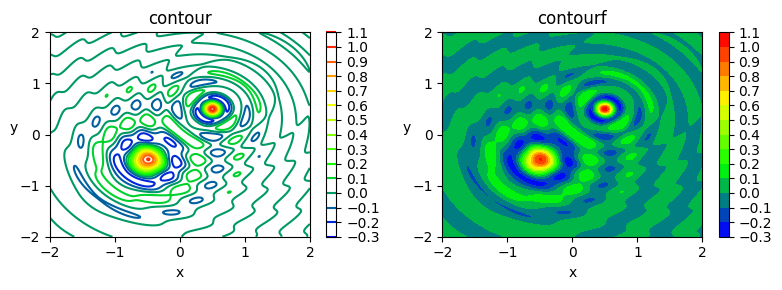

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# 1. wykres
c0 = axes[0].contour(X, Y, Z, 15, cmap=custom_cmap, vmin=Z.min(), vmax=Z.max())

axes[0].axis('tight')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y', rotation=0)
axes[0].set_title("contour")

axes[0].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[0].yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

N = 0.1
cb0 = fig.colorbar(c0, ax=axes[0])
y_major_ticker = mpl.ticker.MultipleLocator(N)
cb0.ax.yaxis.set_major_locator(y_major_ticker)

# 2. wykres
c1 = axes[1].contourf(X, Y, Z, 15, cmap=custom_cmap, vmin=Z.min(), vmax=Z.max())

axes[1].axis('tight')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y', rotation=0)
axes[1].set_title("contourf")

axes[1].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[1].yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

N = 0.1
cb1 = fig.colorbar(c1, ax=axes[1])
y_major_ticker = mpl.ticker.MultipleLocator(N)
cb1.ax.yaxis.set_major_locator(y_major_ticker)

fig.tight_layout()


## <a id='toc1_14_'></a>[Wykresy 3D](#toc0_)

In [112]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [113]:
X, Y = np.meshgrid(np.linspace(-3, 3, 74), np.linspace(-3, 3, 74))

R = np.sqrt(X**2 + Y**2)
Z = np.sin(4 * R) / R

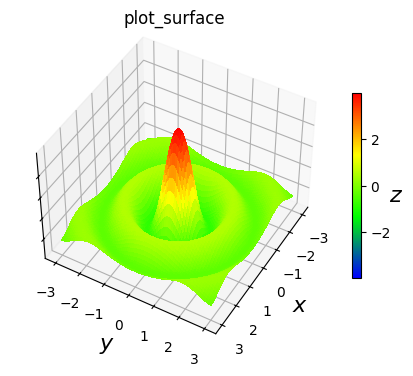

In [150]:
fig, axes = plt.subplots(figsize=(6, 4), subplot_kw={'projection': '3d'})

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

p0 = axes.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=False,  
                       norm=norm, cmap=custom_cmap)

axes.set_title('plot_surface')
axes.view_init(45, 30)
axes.set_xlabel("$x$", fontsize=16)
axes.set_ylabel("$y$", fontsize=16)
axes.set_zticklabels([])

cb = fig.colorbar(p0, ax=axes, shrink=0.6)
cb.ax.set_ylabel("$z$", fontsize=16, rotation=0);

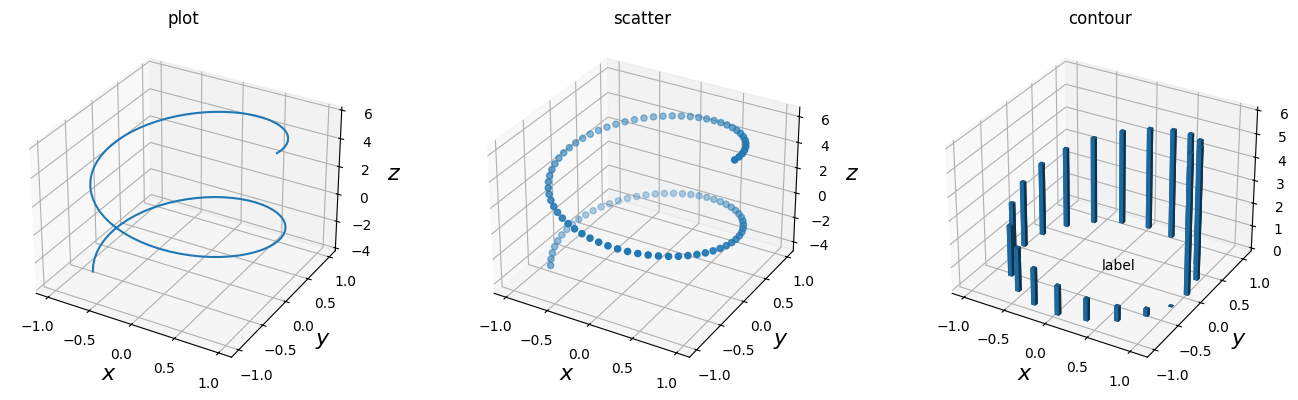

In [154]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), subplot_kw={'projection': '3d'})

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", fontsize=16)
    ax.set_ylabel("$y$", fontsize=16)
    ax.set_zlabel("$z$", fontsize=16)

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

r = np.linspace(0, 10, 100)
p = axes[0].plot(np.cos(r), np.sin(r), 6 - r)
title_and_labels(axes[0], "plot")

p = axes[1].scatter(np.cos(r), np.sin(r), 6 - r)
title_and_labels(axes[1], "scatter")

r = np.linspace(0, 6, 20)
p = axes[2].bar3d(np.cos(r), np.sin(r), 0* np.ones_like(r), 
                  0.05* np.ones_like(r), 0.05 * np.ones_like(r), 6 - r)
title_and_labels(axes[2], "contour")
axes[2].text(0, 0, 0, "label")

fig.tight_layout()